Index([u'userid', u'age', u'dob_day', u'dob_year', u'dob_month', u'gender',
       u'tenure', u'friend_count', u'friendships_initiated', u'likes',
       u'likes_received', u'mobile_likes', u'mobile_likes_received',
       u'www_likes', u'www_likes_received'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_lik

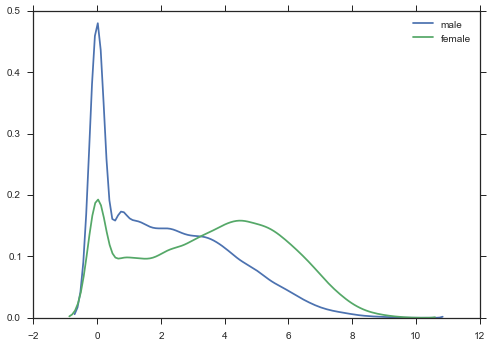

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ggplot import *
%matplotlib inline

df = pd.read_csv('data/pseudo_facebook.tsv', sep='\t')
print df.columns
print df.info()
print df.head()

# df.hist(column='dob_day', bins=df.dob_day.unique().size)
# plt.show()

# p = ggplot(aes(x='dob_day', colour='dob_month'), data=df)
# p + geom_histogram(bins=df.dob_day.unique().size) + facet_wrap('dob_month')

sns.set(style="ticks", color_codes=True)
#g = sns.FacetGrid(df, col="dob_month", col_wrap=3)
#g = g.map(plt.hist, "dob_day", bins=df.dob_day.unique().size)
#plt.show()

#df.hist(column='friend_count', bins=100)
#plt.xlim((0,1000))
#plt.show()

#g = sns.FacetGrid(df, col="gender")
#g = g.map(plt.hist, "friend_count", bins=np.linspace(0,1000,100))
#plt.show()

#print   df[df.gender=='male'].describe()['friend_count']
#print df[df.gender=='female'].describe()['friend_count']

#years_round_up = (int(df.tenure.max()) / 365) + 1
#df.hist(column='tenure', bins=np.linspace(0,years_round_up*365,years_round_up+1))
#plt.show()

df.friend_count.describe()

#l = df.friend_count.size
#d = pd.DataFrame({'friend_count': pd.concat([df.friend_count, (df.friend_count+1).apply(np.log), df.friend_count.apply(np.sqrt)]),
                  #'friend_trans': np.concatenate([np.repeat('cnt',l), np.repeat('log',l), np.repeat('sqr',l)])})
#print d.head()

#g = sns.FacetGrid(d, col="friend_trans")
#g = g.map(plt.hist, "friend_count", bins=1000)
#plt.xlim((0,30))
#plt.show()

df['log_likes'] = np.array((df['likes']+1).apply(np.log))

#g = sns.FacetGrid(df, col="gender")
#g = g.map(plt.hist, "log_likes", bins=25)
#plt.show()

fig, ax = plt.subplots()
sns.kdeplot((df[df['gender']==  'male'])['log_likes'], ax=ax, label='male')
sns.kdeplot((df[df['gender']=='female'])['log_likes'], ax=ax, label='female')
plt.legend()
plt.show()